In [1]:
#######################################################
#import required libraries
import pandas as pd
import random
import numpy as np
from multiprocessing import Pool, cpu_count
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
import keras
import matplotlib as mpl
#######################################################
# Read the CSV file as a DataFrame
df = pd.read_csv('data.csv')
#######################################################
# Read the inputs and outputs
x = df[['i1', 'i2']]       
y= df[['o1', 'o2']]
#######################################################
random.seed(42)  # Set random seed for Python's random module
np.random.seed(42)  # Set random seed for NumPy's random module
#######################################################
# Train test split using SKLearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=43)
########################################################
#Define the Sequential model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='linear'))
#Compile
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
#Train 
history=model.fit(X_train, y_train, epochs=100, batch_size=10, 
                  validation_split=0.1, verbose=1)
########################################################
#Save 
model.save('model.h5')
########################################################
#Test
predictions = model.predict(X_test,workers=8,use_multiprocessing=True)
from sklearn import metrics
r_square=metrics.r2_score(y_test,predictions)
print('R square',r_square)

Epoch 1/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0499 - mse: 0.0499 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2/100
81/81 [==============================] - 0s 4ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 7.6592e-04 - val_mse: 7.6592e-04
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5690e-04 - val_mse: 7.5690e-04
Epoch 5/100
81/81 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 3.0654e-04 - val_mse: 3.0654e-04
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 2.8300e-04 - val_mse: 2.8300e-04
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 2.5207e-04 - val_mse: 2.5207e-04
Epoch 8/100
81/81 [========================

Epoch 57/100
81/81 [==============================] - 0s 3ms/step - loss: 1.2614e-04 - mse: 1.2614e-04 - val_loss: 5.7277e-05 - val_mse: 5.7277e-05
Epoch 58/100
81/81 [==============================] - 0s 3ms/step - loss: 8.6931e-05 - mse: 8.6931e-05 - val_loss: 2.6135e-05 - val_mse: 2.6135e-05
Epoch 59/100
81/81 [==============================] - 0s 3ms/step - loss: 8.9064e-05 - mse: 8.9064e-05 - val_loss: 4.5500e-05 - val_mse: 4.5500e-05
Epoch 60/100
81/81 [==============================] - 0s 3ms/step - loss: 7.5588e-05 - mse: 7.5588e-05 - val_loss: 1.6547e-04 - val_mse: 1.6547e-04
Epoch 61/100
81/81 [==============================] - 0s 2ms/step - loss: 1.6117e-04 - mse: 1.6117e-04 - val_loss: 9.7809e-05 - val_mse: 9.7809e-05
Epoch 62/100
81/81 [==============================] - 0s 2ms/step - loss: 1.2367e-04 - mse: 1.2367e-04 - val_loss: 1.0696e-04 - val_mse: 1.0696e-04
Epoch 63/100
81/81 [==============================] - 0s 3ms/step - loss: 9.0610e-05 - mse: 9.0610e-05 - val_los

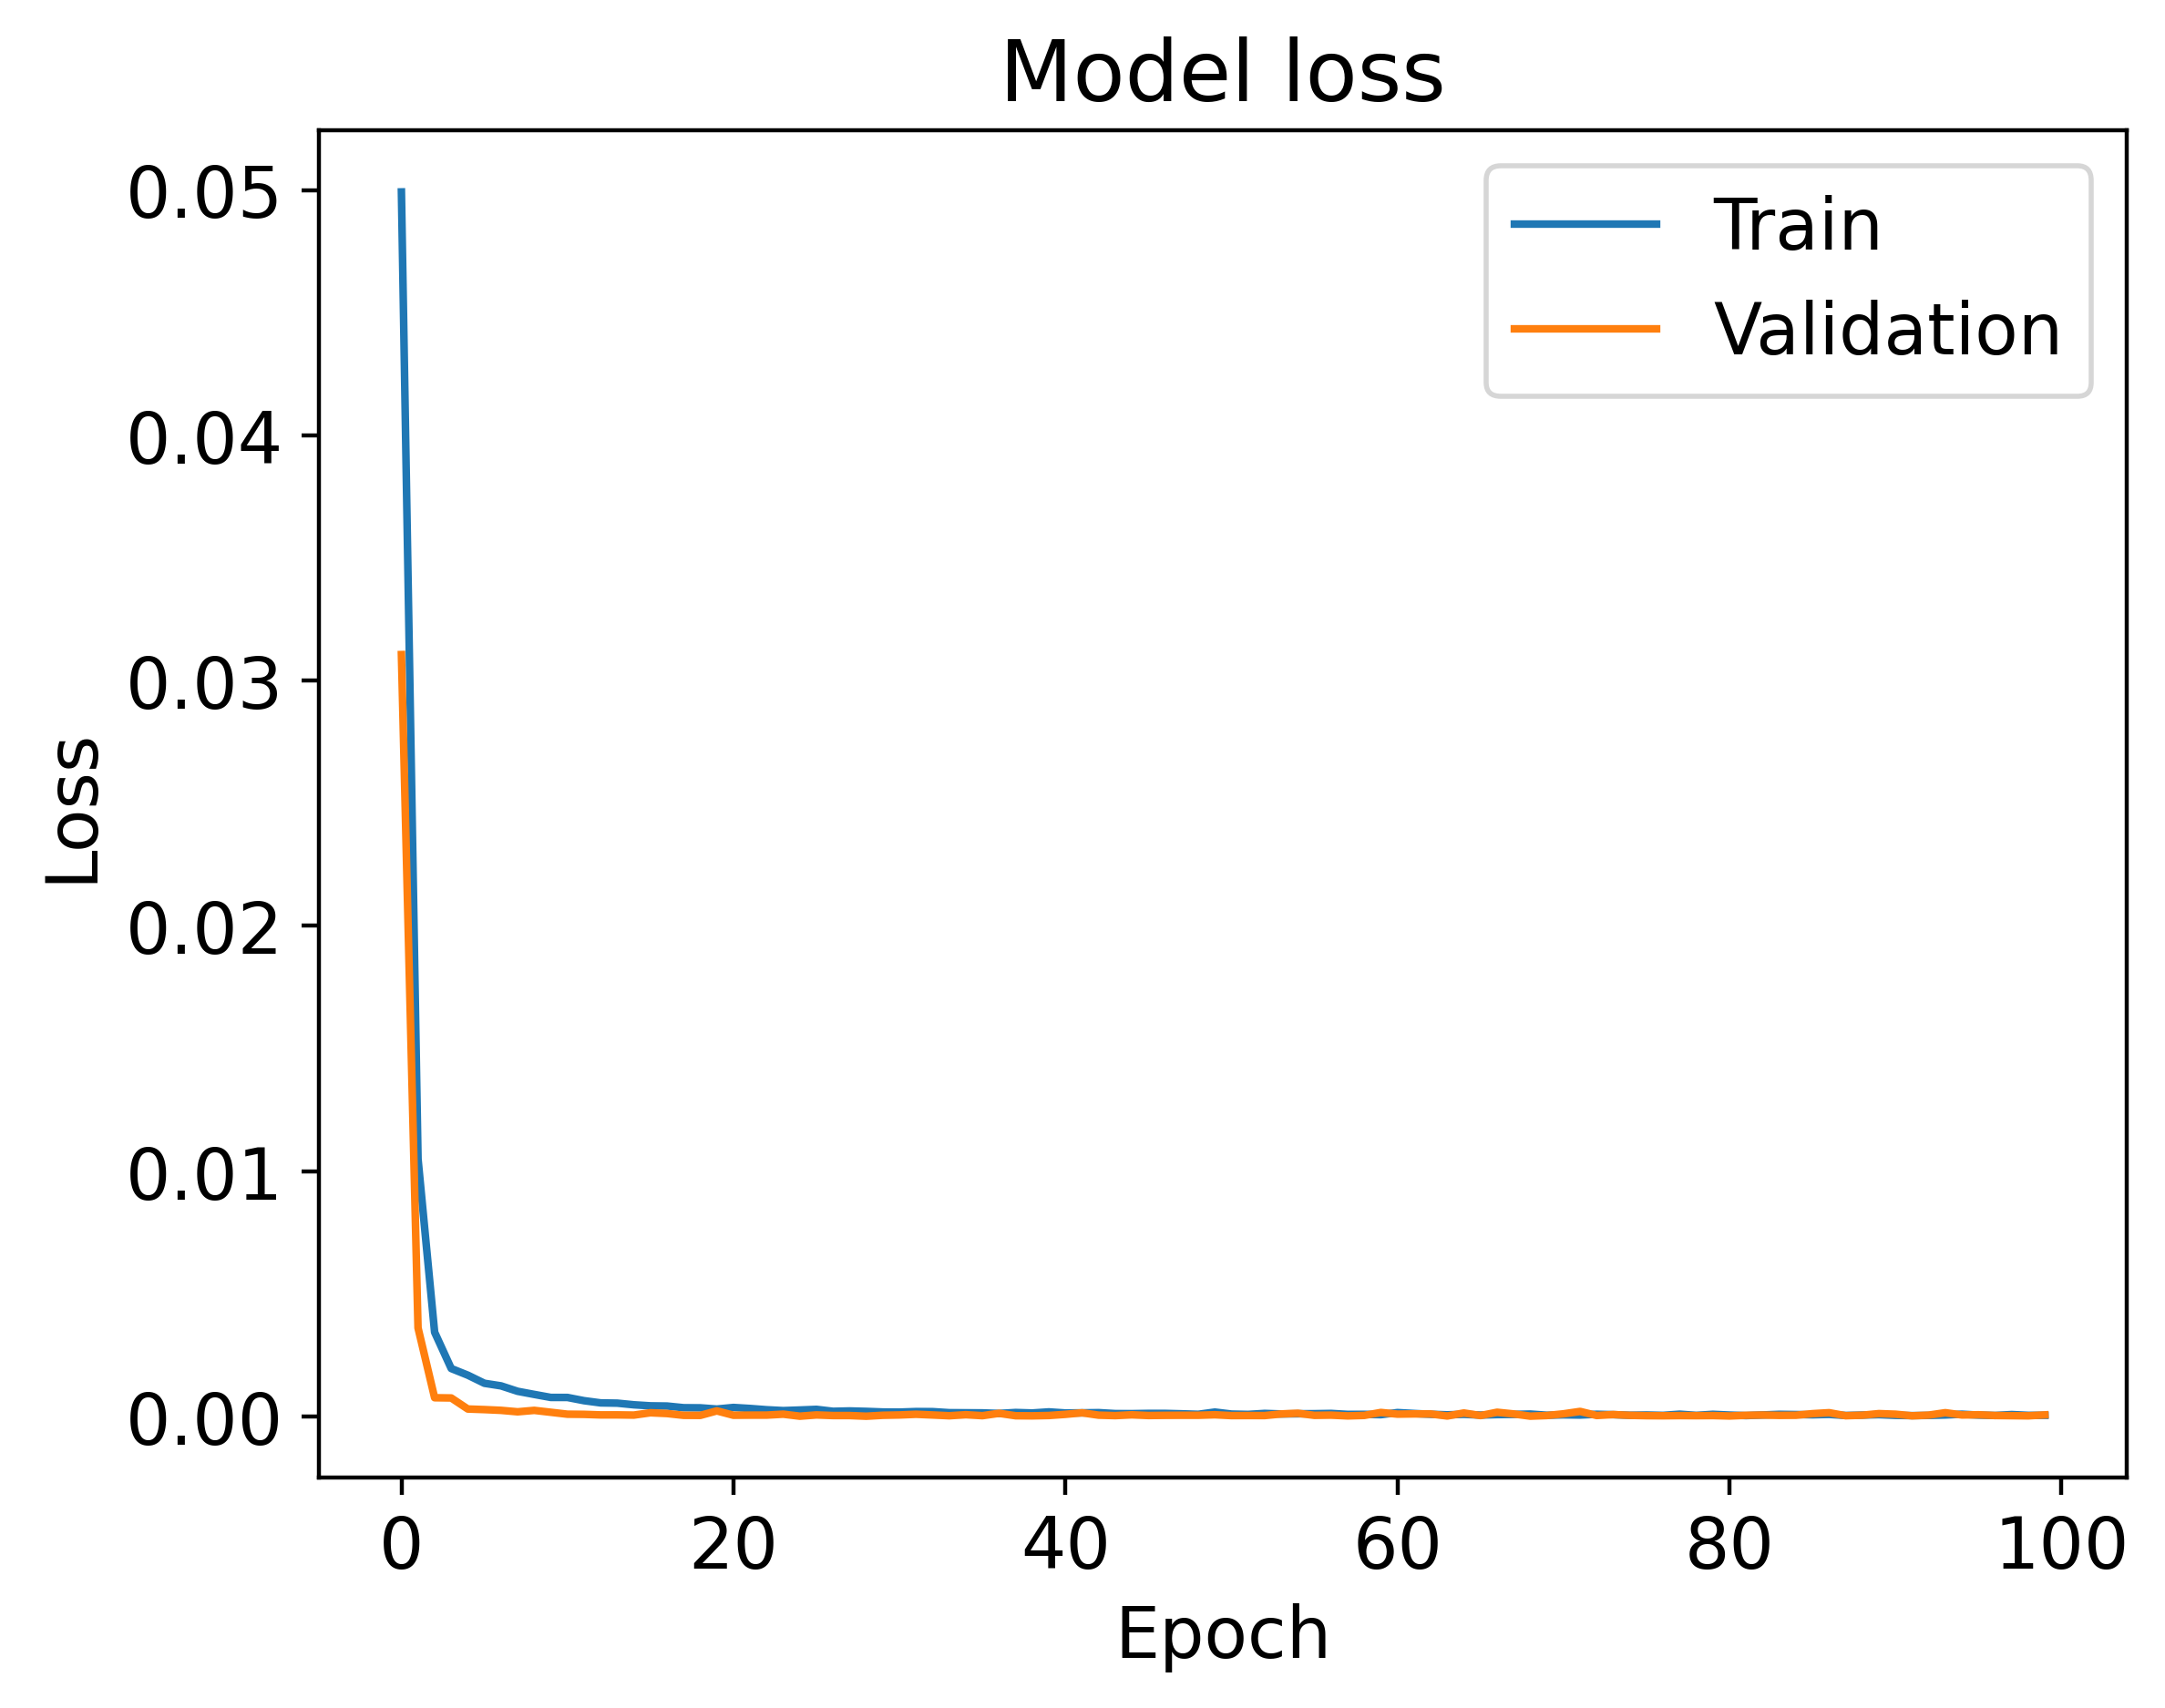

In [2]:
########################################################
import seaborn
from pylab import *
mpl.rcParams['figure.dpi'] = 400
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
########################################################
plt.rcParams.update({'font.size': 14})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

32/32 [==============================] - 0s 4ms/step


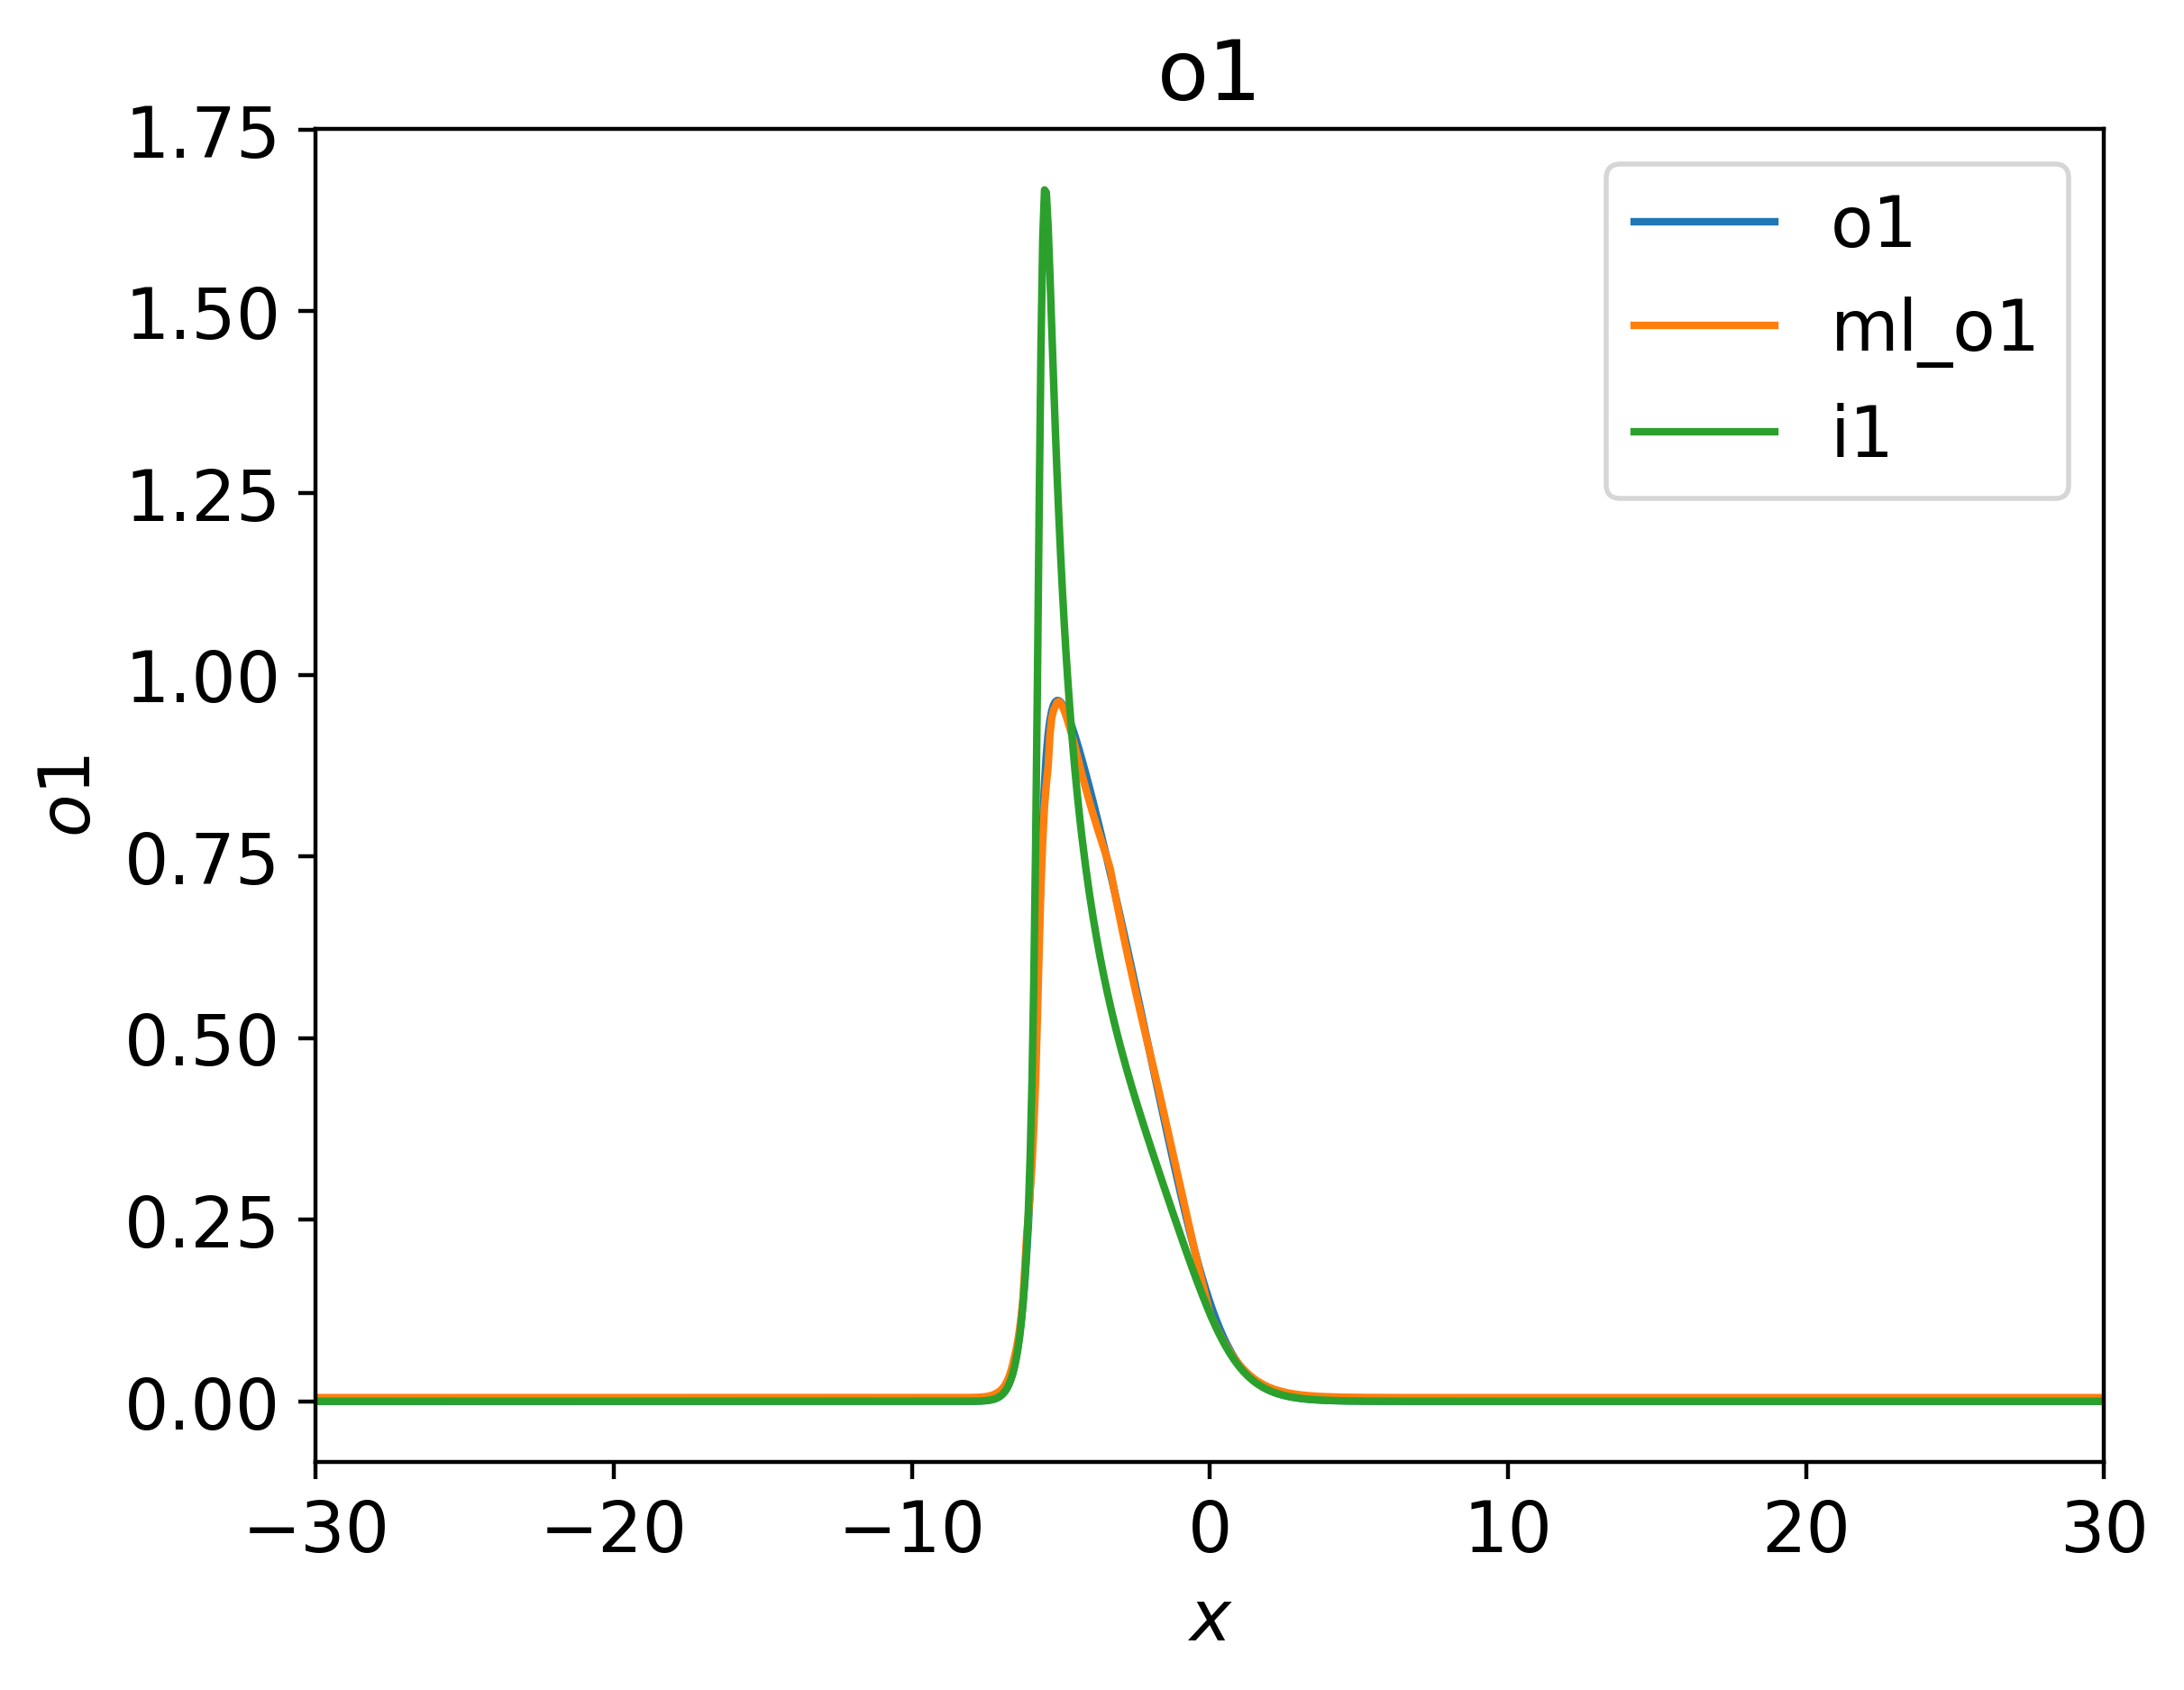

In [3]:
########################################################
#Upload the model for prediction
model = keras.models.load_model('model.h5')
########################################################
#Intentionally used the same data for prediction
# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv')
xin = df[['i1', 'i2']]   
ypred = model.predict(xin,workers=8,use_multiprocessing=True)
ypred = pd.DataFrame(ypred)
ypred0=ypred.iloc[:, 0]
ypred1=ypred.iloc[:, 1]
x = df['x']
########################################################
# Plot the x-y data
plt.plot(x, df['o1'], linestyle='-', label='o1')
plt.plot(x, ypred0, linestyle='-', label='ml_o1')
plt.plot(x, df['i1'], linestyle='-', label='i1')
plt.legend()
# Add labels and title
plt.xlabel(r"$x$")
plt.ylabel(r'$o1$')
plt.title('o1')
plt.xlim(-30, 30)
plt.savefig('o1.png',bbox_inches='tight')
# Display the plot
plt.show()

32/32 [==============================] - 0s 2ms/step


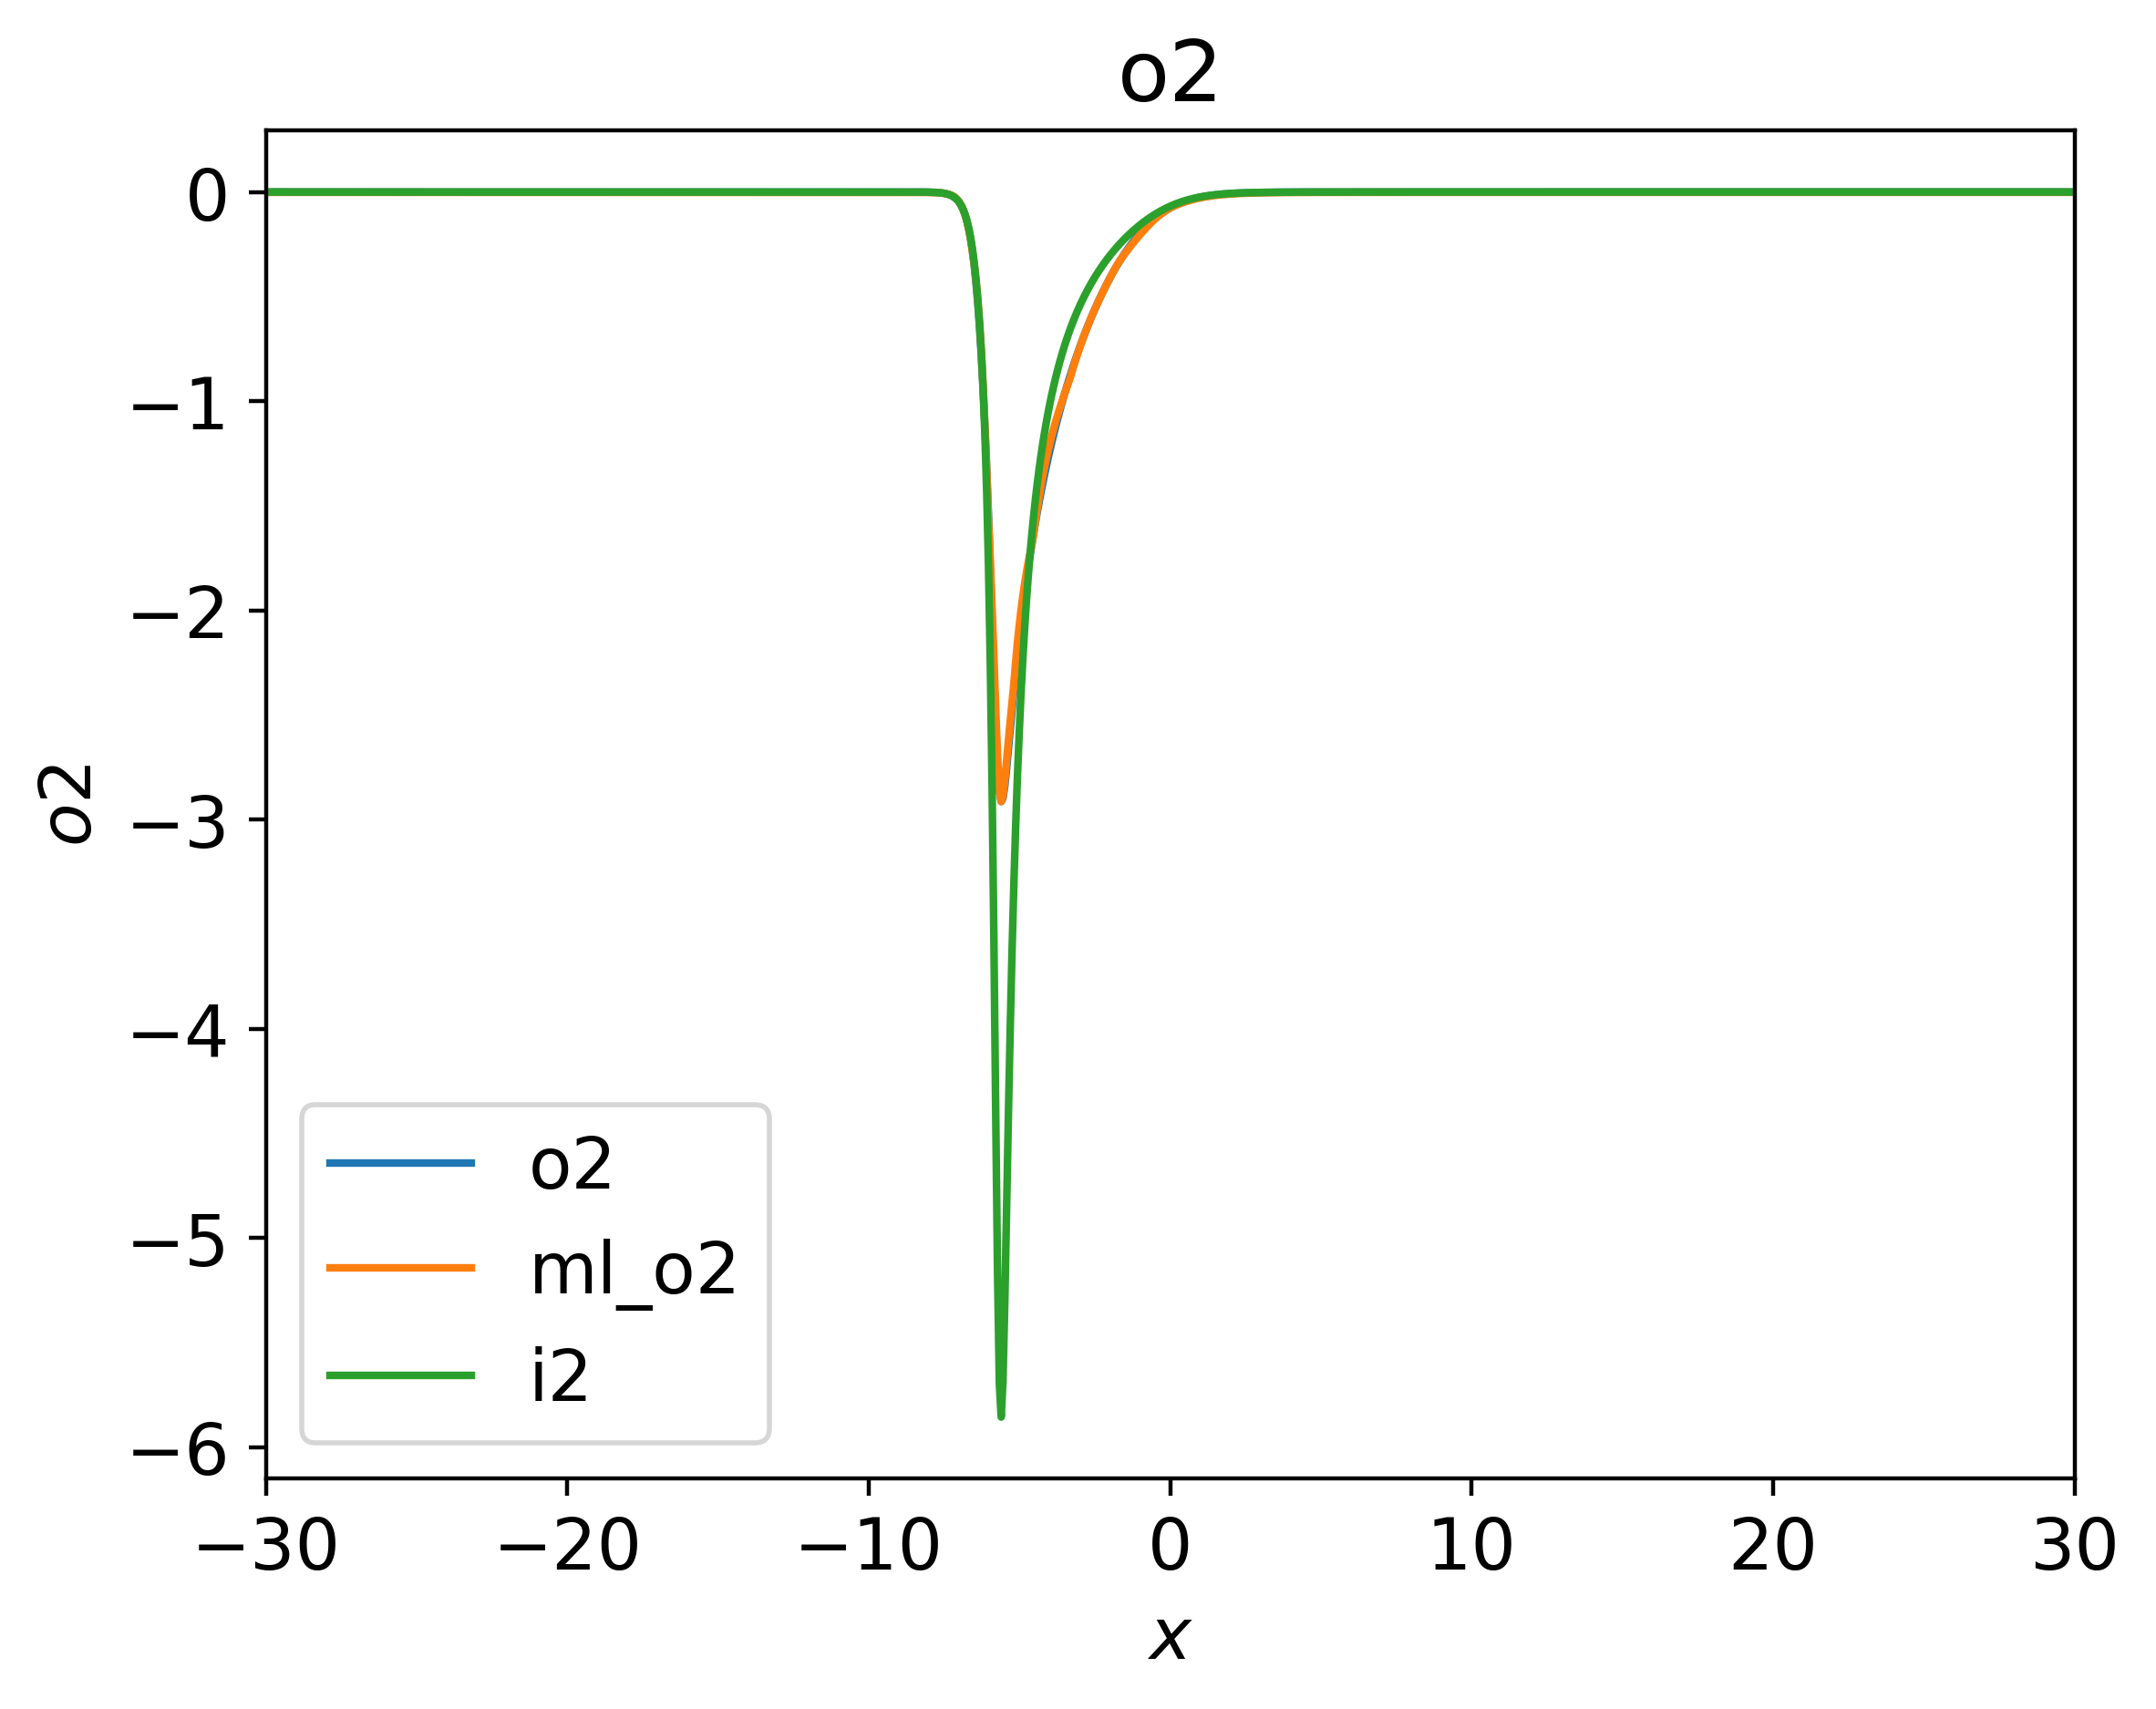

In [4]:
########################################################
#Upload the model for prediction
model = keras.models.load_model('model.h5')
########################################################
#Intentionally used the same data for prediction
# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv')
xin = df[['i1', 'i2']]   
ypred = model.predict(xin,workers=8,use_multiprocessing=True)
ypred = pd.DataFrame(ypred)
ypred0=ypred.iloc[:, 0]
ypred1=ypred.iloc[:, 1]
x = df['x']
########################################################
# Plot the x-y data
plt.plot(x, df['o2'], linestyle='-', label='o2')
plt.plot(x, ypred1, linestyle='-', label='ml_o2')
plt.plot(x, df['i2'], linestyle='-', label='i2')
plt.legend()
# Add labels and title
plt.xlabel(r"$x$")
plt.ylabel(r'$o2$')
plt.title('o2')
plt.xlim(-30, 30)
plt.savefig('o2.png',bbox_inches='tight')
# Display the plot
plt.show()